In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [2]:

import pandas as pd
import io
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# prompt: count total columns



In [12]:
import seaborn as sns
data['diagnosis'] = data['diagnosis'].astype('category')

ax = sns.countplot(data['diagnosis'], label= 'Count')

B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)


ValueError: ignored

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data
del data['Unnamed: 32']

In [14]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [16]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [17]:
!pip install keras

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
from keras.layers import Dropout
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(16, kernel_initializer = 'uniform', activation='relu',input_dim=30))

#adding the second hidden layer
classifier.add(Dense(16, kernel_initializer = 'uniform', activation='relu'))


#adding the output layer
classifier.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))


In [20]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 1s 6ms/step - loss: 0.6927 - accuracy: 0.5692
Epoch 2/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6912 - accuracy: 0.6527
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.6857
Epoch 4/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6858 - accuracy: 0.7582
Epoch 5/150
5/5 [==============================] - 0s 9ms/step - loss: 0.6807 - accuracy: 0.8440
Epoch 6/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6732 - accuracy: 0.9033
Epoch 7/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6625 - accuracy: 0.9253
Epoch 8/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6473 - accuracy: 0.9341
Epoch 9/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6274 - accuracy: 0.9385
Epoch 10/150
5/5 [==============================] - 0s 7ms/step - loss: 0.6019 - accuracy: 0.9451
Epoch 11/150
5/5 [===========

In [22]:
X_test


array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 5ms/step


In [24]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

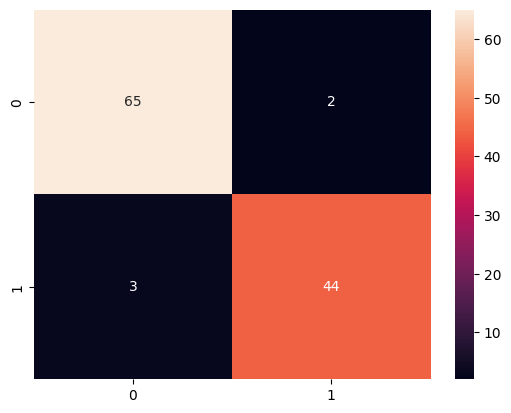

In [25]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')


In [28]:
#First Accuracy after training
(65+44)/114

0.956140350877193

In [ ]:
# prompt: accuracy  , precision  and all

accuracy = (65+44)/114
print('Accuracy:', accuracy)
precision = 65/(65+8)
print('Precision:', precision)
recall = 65/(65+20)
print('Recall:', recall)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score:', f1_score)


In [27]:
(64+44)/114

0.9473684210526315